In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
test_data = pd.read_csv('test_data.csv')
reference_ssid_empty = pd.read_csv('reliable_data_mst_powerful_per_mac_with_empty.csv')
reference_ssid_no_empty = pd.read_csv('reliable_data_mst_powerful_per_mac_no_empty.csv')

'Mon Apr 05 15:08:29 GMT+03:00 2021'

In [4]:
sample = test_data.where(test_data['floor'] == 1).dropna()
sample

,Unnamed: 0,n,id,mac,strength,ssid,zone,floor,datetime
2614,3341.0,3348.0,3390.0,8e:84:a1:74:d3:28,-55.0,Redmi Note 8T,11.0,1.0,Mon Apr 05 15:24:22 GMT+03:00 2021
2615,3342.0,3349.0,3391.0,1c:74:0d:8e:67:90,-57.0,bmstu-89a,11.0,1.0,Mon Apr 05 15:24:22 GMT+03:00 2021
2616,3343.0,3350.0,3392.0,58:ac:78:77:8e:80,-63.0,bmstu_student,11.0,1.0,Mon Apr 05 15:24:22 GMT+03:00 2021
2617,3344.0,3351.0,3393.0,58:ac:78:77:8e:81,-64.0,bmstu_guest,11.0,1.0,Mon Apr 05 15:24:22 GMT+03:00 2021
2618,3345.0,3352.0,3394.0,58:ac:78:77:8e:82,-65.0,bmstu_staff,11.0,1.0,Mon Apr 05 15:24:22 GMT+03:00 2021
...,...,...,...,...,...,...,...,...,...
2687,3415.0,3422.0,3464.0,ea:6f:38:29:11:de,-86.0,DIRECT-de-HP M203 LaserJet,11.0,1.0,Mon Apr 05 15:25:04 GMT+03:00 2021
2688,3416.0,3423.0,3465.0,98:de:d0:72:37:08,-88.0,TP-LINK_190,11.0,1.0,Mon Apr 05 15:25:04 GMT+03:00 2021
2689,3417.0,3424.0,3466.0,50:17:ff:df:70:46,-90.0,bmstu_guest,11.0,1.0,Mon Apr 05 15:25:04 GMT+03:00 2021
2690,3418.0,3425.0,3467.0,c8:3a:35:58:bd:40,-91.0,Tenda_58BD40,11.0,1.0,Mon Apr 05 15:25:04 GMT+03:00 2021


In [5]:
sample = test_data.where(test_data['floor'] == 1).dropna().head(1)
#print(sample)
def single_test(sample, reference_table = reference_ssid_empty, data_set = test_data, output_type='lite'):
    my_mac_list = sample[['mac']].to_numpy().T[0]
    result = pd.DataFrame([],columns=reference_table.columns)
    for mac in my_mac_list:
        if(not reference_table.where(reference_table['mac'] == mac).dropna().empty):
            result = reference_table.where(reference_table['mac'] == mac)
            break
    if (output_type == 'lite'):
        sample = sample.head(1).to_numpy()[0]
        if(result.empty):
            result = [0,0,-1,-1]
        else:
            result = result.dropna().head(1).to_numpy()[0]
        return sample[6], sample[7], result[2], result[3]
    else:
        return sample['mac'], sample['zone'].head(1), sample['floor'].head(1), result.dropna()
single_test(sample, output_type='lit')

(2614    8e:84:a1:74:d3:28
 Name: mac, dtype: object,
 2614    11.0
 Name: zone, dtype: float64,
 2614    1.0
 Name: floor, dtype: float64,
 Empty DataFrame
 Columns: [Unnamed: 0, mac, zone, floor, strength, ssid]
 Index: [])

In [29]:
reference_ssid_empty.where(reference_ssid_empty['mac'] == sample[['mac']].to_numpy().T[0][1]).dropna().empty

False

In [5]:
test_data.nunique()

Unnamed: 0    2729
n             2729
id            2729
mac            594
strength        53
ssid           311
zone            16
floor            6
datetime       152
dtype: int64

In [7]:
reference_ssid_empty.nunique()

Unnamed: 0    484
mac           489
zone           16
floor           9
strength       49
ssid          110
dtype: int64

In [54]:
test_data.where(test_data['datetime'] == mesures_list[0]).dropna()

,Unnamed: 0,n,id,mac,strength,ssid,zone,floor,datetime
0,494.0,495.0,537.0,00:26:52:d8:7e:e1,-69.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
1,495.0,496.0,538.0,d4:ca:6d:0c:2f:ba,-71.0,nii_isu_dep1,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
2,496.0,497.0,539.0,20:cf:30:ce:5d:43,-77.0,IU1-603,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
3,497.0,498.0,540.0,e4:8d:8c:52:83:15,-78.0,shtucer,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
4,498.0,499.0,541.0,06:d6:aa:29:ed:a6,-79.0,AndroidAP,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
5,499.0,500.0,542.0,38:2c:4a:a2:e3:e0,-80.0,Kafedra SM10,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
6,500.0,501.0,543.0,00:26:52:d8:7e:e9,-83.0,bmstu_guest,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
7,501.0,502.0,544.0,00:26:52:d8:7e:e0,-84.0,bmstu_lb,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
8,502.0,503.0,545.0,50:17:ff:df:58:61,-85.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
9,503.0,504.0,546.0,00:26:52:d8:74:91,-87.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021


In [11]:
test_data.where(test_data['mac'] == '00:26:52:d8:7e:e1').dropna()

,Unnamed: 0,n,id,mac,strength,ssid,zone,floor,datetime
0,494.0,495.0,537.0,00:26:52:d8:7e:e1,-69.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
21,515.0,516.0,558.0,00:26:52:d8:7e:e1,-78.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:14 GMT+03:00 2021
42,537.0,538.0,580.0,00:26:52:d8:7e:e1,-77.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:35 GMT+03:00 2021


In [27]:
test_data = test_data.where(test_data['zone'] > 1).mask(test_data['zone'] == 7).mask(test_data['zone'] == 8).dropna()
test_data.shape

(2496, 9)

In [13]:
test_data = test_data.where(test_data['floor']>1).dropna()
test_data.shape

(2614, 9)

In [16]:
mesures_list = test_data[['datetime']].to_numpy().T[0]
mesures_list = pd.unique(mesures_list)
mesures_list[92]

'Mon Apr 05 15:08:29 GMT+03:00 2021'

total 144 zones recognised 107 74.30555555555556 floores_recognised 117 81.25
zones_tested [ 2  4  7 10  8  6 12 11  1 10 18 14  6 10 16  9]
zones_unguessed [0 0 3 6 2 3 5 4 1 4 1 1 2 1 2 2]
floores_tested [ 0  0 64 37 28 15  0  0  0  0  0]
floores_unguessed [ 0  0  7 10  6  4  0  0  0  0  0]


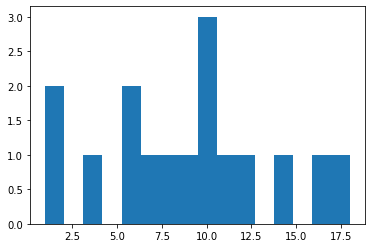

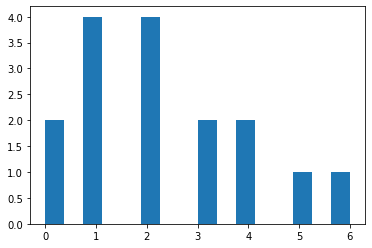

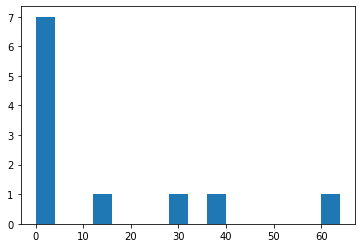

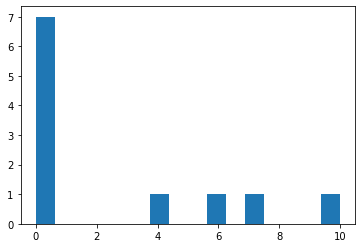

In [17]:
#check full test data
i = 0 #total samples checked
fl_correct = 0 # total floores recognised correcty
z_correct = 0  # total zones recognised correcty
zones_tested = np.zeros((16,), dtype=int)
zones_unguessed = np.zeros((16,), dtype=int)
floores_tested = np.zeros((11,), dtype=int)
floores_unguessed = np.zeros((11,), dtype=int)

for mesure in mesures_list:
    i = i+1
    ftd_sample = test_data.where(test_data['datetime'] == mesure).dropna()
    test_result = np.int_(single_test(ftd_sample, reference_table=reference_ssid_no_empty))
    #print(i, test_result)
    zones_tested[test_result[0]]=zones_tested[test_result[0]]+1
    floores_tested[test_result[1]]=floores_tested[test_result[1]]+1
    if(test_result[0]==test_result[2]):
        z_correct = z_correct+1
    else:
        zones_unguessed[test_result[0]]=zones_unguessed[test_result[0]]+1
    
    if(test_result[1]==test_result[3]):
        fl_correct = fl_correct+1
    else:
        floores_unguessed[test_result[1]]=floores_unguessed[test_result[1]]+1
print('total', i, 'zones recognised', z_correct,  z_correct/i*100, 'floores_recognised', fl_correct, fl_correct/i*100)
print('zones_tested',zones_tested)
print('zones_unguessed',zones_unguessed)
print('floores_tested',floores_tested)
print('floores_unguessed',floores_unguessed)
data_for_hist = []
#data_new_2['mac', 'strength']
#data_for_hist.append(data_new_2.columns[3])
data_for_hist.append(zones_tested)
data_for_hist.append(zones_unguessed)
data_for_hist.append(floores_tested)
data_for_hist.append(floores_unguessed)
for col in data_for_hist:
    plt.hist(col, 16)
    #plt.xlabel(col)
    plt.show()

In [11]:
reference_ssid_empty.where(reference_ssid_empty['floor'] == 1).dropna()

,Unnamed: 0,mac,zone,floor,strength,ssid
449,1229.0,c8:60:00:95:33:e9,2.0,1.0,-92.0,MT7-216_5G


total 144 zones recognised 107 74.30555555555556 floores_recognised 117 81.25
zones_tested [11. 11. 11. 10. 10. 10. 14. 14.  9.  9.  9.  2.  2. 11. 11. 11. 10. 10.
 10. 14. 14. 14.  9. 14. 14. 10. 10. 11. 11. 12. 12. 12. 15. 15. 13. 13.
 13. 13. 13. 13. 15. 15. 15. 15. 15. 13. 13. 13. 13. 15. 15. 12. 12. 12.
 11. 11. 11. 10. 10. 10. 14. 14. 14.  9.  9.  9.  2.  9.  9. 14. 14. 10.
 10.  4. 10. 10. 10. 14. 14.  9. 14. 14. 10. 10. 11. 11. 11.  6.  6.  6.
  6.  6.  6.  7.  7.  7.  6.  6.  6.  7.  7.  7.  7.  1.  1.  1.  1.  8.
  7.  7.  7.  7.  5.  5.  5.  4.  4.  4.  4.  4.  4.  4.  3.  3.  3.  3.
  3.  3.  2.  2.  2.  2.  0.  0.  3.  3.  3.  3.  5.  5.  5.  6.  6.  6.]
zones_unguessed [ 9.  9.  2.  2. 10.  9. 12. 12. 15. 13. 15. 11. 14.  9.  2. 14.  4.  6.
  6.  7.  7.  7.  6.  6.  7.  8.  5.  4.  3.  3.  3.  3.  3.  3.  5.  5.
  6.]
floores_tested [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 4. 4. 4. 3. 3. 3. 3

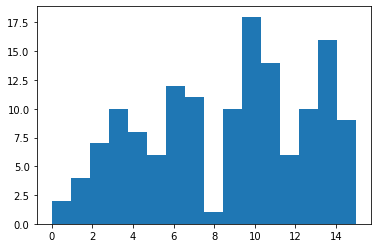

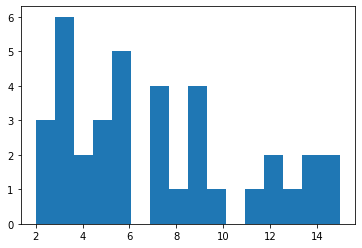

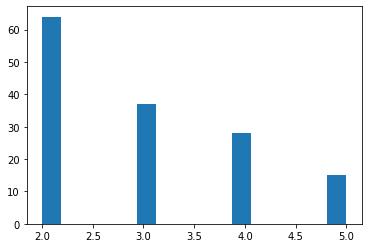

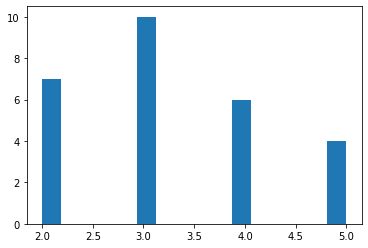

In [18]:
#check full test data
i = 0 #total samples checked
fl_correct = 0 # total floores recognised correcty
z_correct = 0  # total zones recognised correcty
zones_tested = np.array([])
zones_unguessed = np.array([])
floores_tested = np.array([])
floores_unguessed = np.array([])

for mesure in mesures_list:
    i = i+1
    ftd_sample = test_data.where(test_data['datetime'] == mesure).dropna()
    test_result = np.int_(single_test(ftd_sample, reference_table=reference_ssid_no_empty))
    #print(i, test_result)
    zones_tested = np.append(zones_tested, test_result[0])
    floores_tested = np.append(floores_tested, test_result[1])
    if(test_result[0]==test_result[2]):
        z_correct = z_correct+1
    else:
        zones_unguessed = np.append(zones_unguessed, test_result[0])
    
    if(test_result[1]==test_result[3]):
        fl_correct = fl_correct+1
    else:
        floores_unguessed = np.append(floores_unguessed, test_result[1])
print('total', i, 'zones recognised', z_correct,  z_correct/i*100, 'floores_recognised', fl_correct, fl_correct/i*100)
print('zones_tested',zones_tested)
print('zones_unguessed',zones_unguessed)
print('floores_tested',floores_tested)
print('floores_unguessed',floores_unguessed)
data_for_hist = []
#data_new_2['mac', 'strength']
#data_for_hist.append(data_new_2.columns[3])
data_for_hist.append(zones_tested)
data_for_hist.append(zones_unguessed)
data_for_hist.append(floores_tested)
data_for_hist.append(floores_unguessed)
for col in data_for_hist:
    plt.hist(col, 16)
    #plt.xlabel(col)
    plt.show()